make_sf_1D_full: 0.228719 sec
jso:{
Np:131071
dx:0.1
m:0.28
gamma:1
eta:2e-05
eta_p:0.0008
kappa:1
K_s:39000000000.0
K_f:57000000000.0
K_m:8500000000.0
rho_s:2650
rho_f:700.0
eps:1e-15
kwd:{}
mKx:array([[4.28880112e+10, 3.27296820e+10],
       [3.27296820e+10, 4.18510688e+10]])
mMx:array([[2104.,  700.],
       [ 700., 2500.]])
mKdx:array([[34310408.96532939,        0.        ],
       [       0.        ,        0.        ]])
mMdx:array([[0.e+00, 0.e+00],
       [0.e+00, 2.e-05]])
}


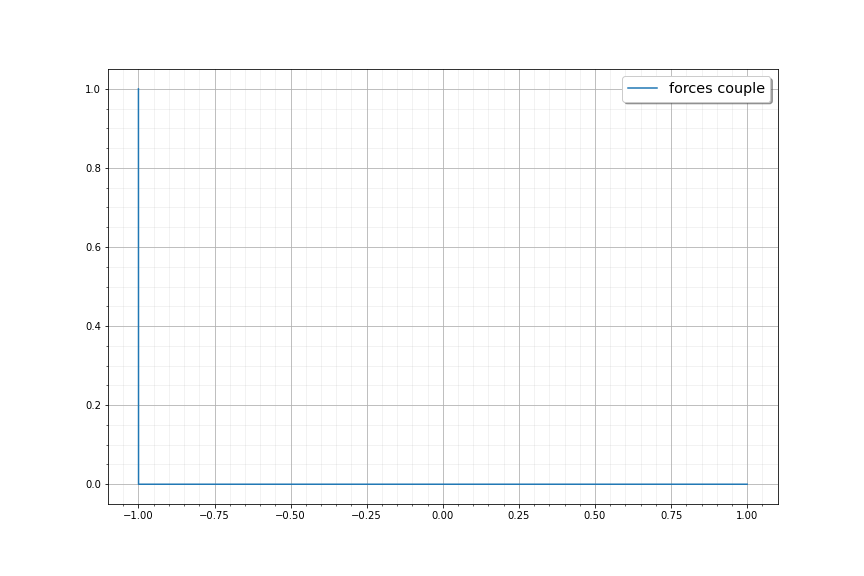

In [41]:
from utils import *
from jsobj import *
from IPython.display import display, clear_output
import numpy as np
norm=np.linalg.norm

#from waves.fluid_solid_1FEM import *
from waves.fluid_solid_regions import *
from LIPA2.qp_solver import *
#[smK,smG,smM,params]=py.lncall('make_sf_1D_full',{N,dx},{'fcycle',fcycle},{'rho_f',0.7e3},{'xeta_p',0.8e-3},{'eta',0.2e-4},{'m',mp});
N=16000;
N=20000;
N=128*1024;
#N=32*1024;
fcycle=0
dx=0.1
mp=0.2
mp=0.5
mp=0.28
#mp=0.028



tic()

mK,mM,mG,params0=make_sf_1D_rgn(N-1,dx,rho_f=0.7e3,eta_p=0.8e-3,eta=0.2e-4,m=mp)

#model=reparse_mesh(':file:mod0.json')
model=model_expand(':file:mod0.json')
prms0=to_dict(model.main_region.params)
'''
prms0['gamma']=1.0
prms0['kappa']=1.0
prms0['rho_s']=2650.0
'''
prms={
 
"qm":0.28,
"qgamma":1,
"qeta":2e-05,
"qeta_p":0.0008,
"qkappa":1,
"K_s":39000000000.0,
"K_f":57000000000.0,
"K_m":8500000000.0,
"qrho_s":2650,
"qrho_f":700.0,
 "qeps":1e-15
}
#prms0.update(prms)
#
[smK,smG,smM,params]=make_sf_1D_full(N,dx,fcycle=fcycle,**prms0);

#[smK,smG,smM,params]=make_sf_1D_full(N,dx,fcycle=fcycle,rho_f=0.7e3,eta_p=0.8e-3,eta=0.2e-4,m=mp);
toc('make_sf_1D_full:')
print(repr(jso(params)))
'''
tic();mK,mM,mG,dx,N,model=model2FEM1D(':file:mod0.json',N);toc(':')
tic();[smK,smG,smM]=make_sf_FEM([mK,mG,mM]);toc('sp:')
N=int(smK.shape[0]/2)
'''


mm=2
D=0.01
#D=0.0025
#D=0.00025
D=0.01
D=0.001
D=0.1
r=2*(np.arange(0,N)/N) -1

x0=np.exp(-(np.abs(r)/D)**mm);
f0=r*x0;
f0=(r**3)*x0;
##################################
f0[:]=0
f0[0]=1

#%matplotlib widget
%matplotlib inline
import matplotlib.pyplot as plt

%matplotlib widget
#fig=plt.figure(figsize=(12,8))
fig, ax = plt.subplots(figsize=(12,8))
#fig.suptitle('sensors data + pure response ', fontsize=16)
ax.grid(True,which='major')
ax.minorticks_on()
ax.grid(True,which='minor',alpha=0.2)

ax.plot(r,f0,label='forces couple')
legend = ax.legend(loc='upper right', shadow=True, fontsize='x-large')





In [40]:
N

32768

 3.8792 sec


3.8792037000021082

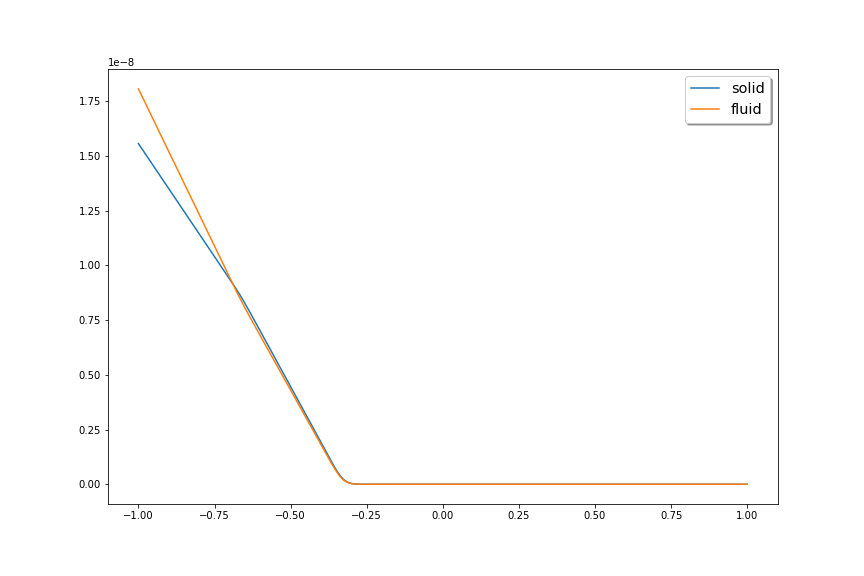

In [33]:
from LIPA2.qp_solver import *

#py.call('lb=lipa_qp_base_t',{smK,smG,smM},pade_nm,'sp_LU_factory',nd);
dt=0.2;
dt=0.02;
dt=0.01
pade_nm=[4,6]
pade_nm=[7,8]
nd=5
solver=lipa_qp_base_t([smK,smG,smM],pade_nm,'sp_LU_factory',nd)
solver.reset(dt)

f=np.zeros([N,2],dtype=complex);
f[:,0]=f0
f[:,1]=f0
solver.x=0
solver.f=f.reshape(-1)



vf=lambda x,y: y+mp*x

fig2, ax2 = plt.subplots(figsize=(12,8))
#fig.suptitle('sensors data + pure response ', fontsize=16)

ax2.grid(True,which='major')
ax2.minorticks_on()
ax2.grid(True,which='minor',alpha=0.2)
def step_plot(rep=10,d=0):
    nb=0
    xx=solver(rep).reshape(nd,-1,2)
    x=xx[d][nb:,0]
    y=xx[d][nb:,1]
    r1=r[nb:]
    ax2.clear()
    ax2.plot(r1,x.real,label='solid')
    ax2.plot(r1,vf(x,y).real,label='fluid')
    legend = ax2.legend(loc='upper right', shadow=True, fontsize='x-large')
    fig2.canvas.draw()
    fig2.canvas.flush_events()


step_plot(rep=0,d=1)


tic();step_plot(rep=31,d=0);toc('')




In [38]:
#solver.xx=0
tic();step_plot(rep=1,d=1);toc('')

 0.259861 sec


0.25986099999863654

In [ ]:
xx=solver(1).reshape(nd,-1,2)
max(xx.reshape(-1))

In [ ]:
vf=lambda x,y: (y+x*mp)

In [ ]:
NT=200;
tt=np.arange(0,NT)*dt
yy=solver.dump(NT,2);
q=yy.reshape(200,nd,-1,2)

In [ ]:
yx=yy[:,1,3]

In [ ]:
fig, ax = plt.subplots(figsize=(12,8))
#fig.suptitle('sensors data + pure response ', fontsize=16)
ax.grid(True,which='major')
ax.minorticks_on()
ax.grid(True,which='minor',alpha=0.2)
xd=3000
d=2
ax.plot(tt,q[:,d,xd,0],tt,q[:,d,xd,1])
legend = ax.legend(loc='upper right', shadow=True, fontsize='x-large')


In [ ]:
xx=solver(1).reshape(nd,-1,2)

In [ ]:
solver.xx=0

In [ ]:
solver(1).shape

In [ ]:
yy.shape

In [ ]:
q=yy.reshape(200,nd,-1,2)

In [ ]:
smK

In [15]:
tic();mK,mM,mG,dx,N,model=model2FEM1D(':file:model1D.json',N);toc(':')
#tic();
[smK,smG,smM]=make_sf_FEM([mK,mG,mM]);mtoc('sp:')


: 0.0188401 sec
sp: 45.835 Ms


45.83499999898777

In [ ]:
mK,mM,mG,dx

In [ ]:
model

In [ ]:
__file__